# IoU / Dice coefficient

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.losses as losses
from glob import glob

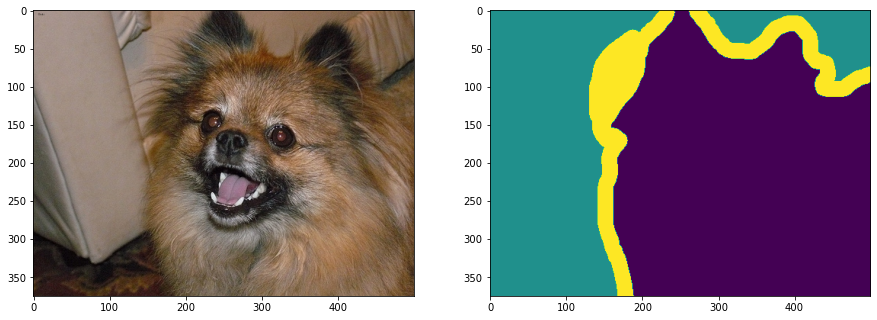

In [2]:
#trimaps/ Trimap annotations for every image in the dataset
#    Pixel Annotations: 1: Foreground 2:Background 3: Not classified

image_files = glob('data/images/*.jpg')
image_path = image_files[134]
seg_path = image_path.replace('images', 'annotations/trimaps')
seg_path = seg_path.replace('jpg', 'png')

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
seg_map = cv2.imread(seg_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(seg_map)
plt.show()

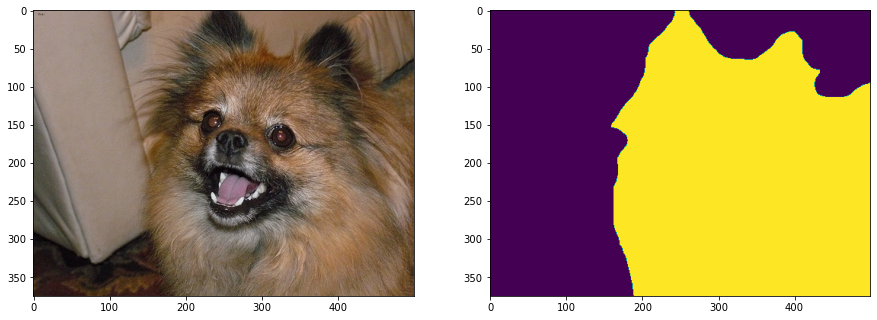

In [3]:
seg_map[seg_map != 1] = 0
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(seg_map)
plt.show()

# IoU/Jaccard Index
![alt text](iou.png "Title")


# Dice coefficient
![alt text](dice.png "Title")

In [8]:
'''
y_true = | 0 | 1 | 1 | 0 |
y_pred = | 0.5 | 1 | 0.2 | 0.3 |
y_true * y_pred = | 0 | 1 | 0.2 | 0 | -> 1.2
'''

def iou(y_true, y_pred):
    smooth = 0.
    
    # Flatten
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    
    score = intersection / (union + smooth)
    return score


def dice_coef(y_true, y_pred):
    smooth = 0.
    
    # Flatten
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    
    intersection = tf.reduce_sum(y_true * y_pred)
    score = (2. * intersection) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)
    
    return score


def dice_loss(y_true, y_pred):
    loss = 1 - dice_coef(y_true, y_pred)

    return loss


def bce_dice_loss(y_true, y_pred):
    loss = 1.*losses.binary_crossentropy(y_true, y_pred) + 1.*dice_loss(y_true, y_pred)

    return loss

In [9]:
print(dice_coef(seg_map.astype('float32'), seg_map.astype('float32')).numpy())
print(iou(seg_map.astype('float32'), seg_map.astype('float32')).numpy())

1.0
1.0


In [10]:
zeros = np.zeros_like(seg_map)
print(dice_coef(seg_map.astype('float32'), zeros.astype('float32')).numpy())
print(iou(seg_map.astype('float32'), zeros.astype('float32')).numpy())

0.0
0.0


In [12]:
ones = np.ones_like(seg_map)
print(dice_coef(seg_map.astype('float32'), ones.astype('float32')).numpy())
print(iou(seg_map.astype('float32'), ones.astype('float32')).numpy())

0.7073958
0.547264
